In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 8.2MB 5.4MB/s 


отдельно в файлы я загружала все тексты песен по отдельности, надо внизу в соответствующем чанке прописать тут кодировку, в которой у вас сохранены txt


In [ ]:
import pandas as pd
import re
import string
import pymorphy2
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
morph = pymorphy2.MorphAnalyzer()
stopwords_list = stopwords.words('russian')
stopwords_list.extend(['куплет', 'это', 'я', 'мы', 'ты', 'припев', 'аутро', 'предприпев', 'lyrics', '1', '2', '3', 'то', 'ох'])
string.punctuation += '—'

вот тут словарь для альбома аквариума

In [ ]:
result_dict = dict()

songs_dict = {
    'cyclon':'Центр циклона',
    'maxim':'Максим-лесник',
    'toska':'Древне-русская тоска',
    'dubrowski':'Дубровский',
    'nastasia':'Инцидент в Настасьино',
    'istreb':'Истребитель',
    'brahman':'Черный брахман',
    'railroad':'Великая железнодорожная симфония'
}

вот тут словарь для Земфиры

In [ ]:
result_dict = dict()

songs_dict = {
    'snow':'снег идёт',
    'crimea':'крым',
    'mother':'мама',
    'ostin':'остин',
    'abuse':'абьюз',
    'wait_for_me':'жди меня',
    'tom':'том',
    'come_on':'камон',
    'coat':'пальто',
    'this_summer':'этим летом',
    'ok':'ок',
    'pills':'таблетки',
    'life':'жить в моей голове',
    'nochance':'без шансов',
    'money':'деньги',
    'coffee':'кофевино',
    'chaika':'чайка',
    'esli':'если бы',
    'buried':'похоронила',
    'river':'река',
    'flip':'кувырок',
    'mount':'гора'
}

тут ниже я использую кодировку для мака - maccyrillic возможно надо поменять на свою


In [ ]:
def read_song(filename):
    f = open(f'{filename}.txt', 'r', encoding='maccyrillic').read()
    f = f.replace('\n', ' ')
    return f

In [ ]:
def clean_string(text):
    text = re.split(' |:|\.|\(|\)|,|"|;|/|\n|\t|-|\?|\[|\]|!', text)
    text = ' '.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords_list])
    return text

In [ ]:
def string_to_normal_form(string):
    string_lst = string.split()
    for i in range(len(string_lst)):
        string_lst[i] = morph.parse(string_lst[i])[0].normal_form
        if (string_lst[i] == 'аду'):
            string_lst[i] = 'ад'
        if (string_lst[i] == 'рая'):
            string_lst[i] = 'рай'
    string = ' '.join(string_lst)
    return string

вот тут для каждой песни альбома надо задать длину вручную

In [ ]:
name_list = []
text_list = []
for song, name in songs_dict.items():
    text = string_to_normal_form(clean_string(read_song(song)))
    name_list.append(name)
    text_list.append(text)
df = pd.DataFrame()
df['name'] = name_list
df['text'] = text_list
df['time'] = [290, 220, 187, 270, 330, 196, 207, 188, 269, 189, 245, 244, 324, 166, 217, 213, 204, 224, 209, 204, 216, 317]
df.to_csv('timetoN.csv', index=False)

In [ ]:
df

,name,text,time
0,снег идёт,ворваться твой жизнь обалдеть захотеть любовь ...,290
1,крым,быть я жить попробовать бросить пить однозначн...,220
2,мама,другой цвет другой цвет другой цвет другой цве...,187
3,остин,здравствуй остин привет остин давно видеться п...,270
4,абьюз,знать черта черта некий портрет поступок слово...,330
5,жди меня,написать ты письмо он ровно 20 слово писать на...,196
6,том,найти дом найти он обмыть найти друг желательн...,207
7,камон,разойтись дом камон знать никто отдать ад рай ...,188
8,пальто,текст песня «пальто» красивый пальто набережна...,269
9,этим летом,мой голос ложь фальшь какой тон твой волос иск...,189


In [ ]:
import nltk
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize, ngrams

%matplotlib inline
nltk.download('punkt')
df = pd.read_csv('timetoN.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


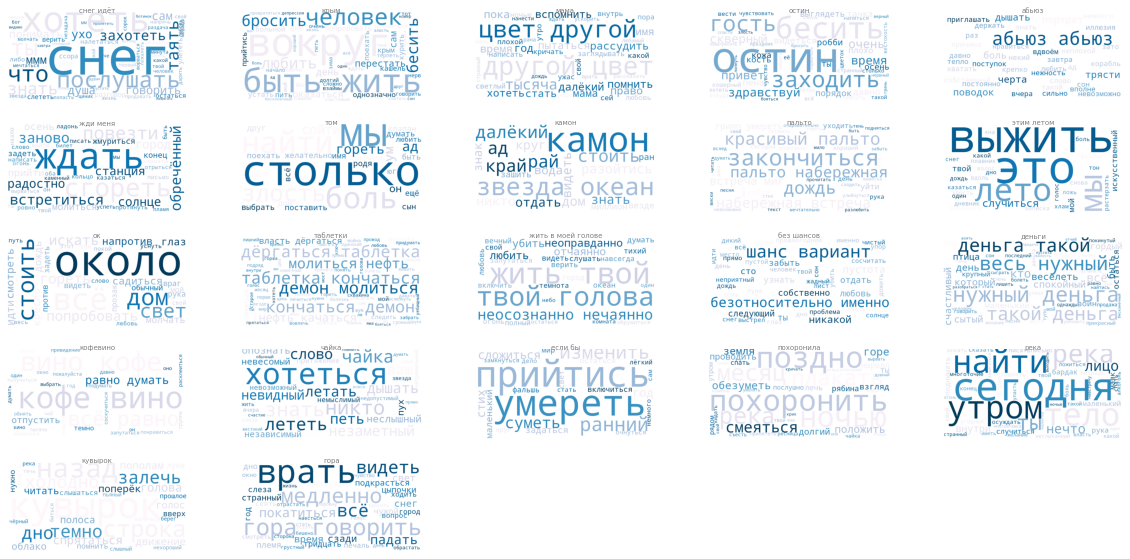

In [ ]:
fig = plt.figure(figsize=(20,10))
fig.patch.set_facecolor('white')
plt.subplots_adjust(wspace=0.3, hspace=0.2)
i = 1
for name, text in zip(df.name, df.text):
    tokens = word_tokenize(text)
    text_raw = " ".join(tokens)
    wordcloud = WordCloud(colormap='PuBu', background_color='white', contour_width=10, width=800, height=400).generate(text_raw)
    plt.subplot(5, 5, i, label=name,frame_on=True)
    plt.tick_params(labelsize=10)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(name,fontdict={'fontsize':7,'color':'grey'},y=0.93)
    plt.tick_params(labelsize=10)
    i += 1

In [ ]:
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy import spatial
import collections
import pymorphy2
import gensim

morph = pymorphy2.MorphAnalyzer()

In [ ]:
songs = []
total = []
uniq = []
percent = []

for song, text in zip(df.name, df.text):
    songs.append(song)
    total.append(len(text.split()))
    uniq.append(len(set(text.split())))
    percent.append(round(len(set(text.split())) / len(text.split()), 2) * 100)

In [ ]:
df_words = pd.DataFrame()
df_words['song'] = songs
df_words['total words'] = total
df_words['uniq words'] = uniq
df_words['percent'] = percent
df_words['time'] = df['time']
df_words['words per minute'] = round(total / (df['time'] // 60))
df_words = df_words[::-1]

In [ ]:
colors_1 = ['rgba(101,181,205,255)'] * 12
colors_2 = ['rgba(62,142,231,255)'] * 12

fig = go.Figure(data=[
    go.Bar(name='📝 Всего слов',
           text=df_words['total words'],
           textposition='auto',
           x=df_words.song,
           y=df_words['total words'],
           marker_color=colors_1,
           marker=dict(line=dict(width=0)),),
    go.Bar(name='🌀 Уникальных слов',
           text=df_words['uniq words'].astype(str) + '<br>'+ df_words.percent.astype(int).astype(str) + '%' ,
           textposition='inside',
           x=df_words.song,
           y=df_words['uniq words'],
           textfont_color='white',
           marker_color=colors_2,
           marker=dict(line=dict(width=0)),),
])

fig.update_layout(barmode='group')

fig.update_layout(
    title = 
        {'text':'<b>Соотношение числа уникальных слов к общему количеству</b><br><span style="color:#666666"></span>'},
    showlegend = True,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)',
)
fig.update_layout(legend=dict(
    yanchor="top",
    xanchor="right",
))

fig.show()

In [ ]:
colors_1 = ['rgba(101,181,205,255)'] * 22
colors_2 = ['rgba(238,85,59,255)'] * 12

fig = go.Figure(data=[
    go.Bar(name='⏱️ Длина трека, мин.',
           text=round(df_words['time'] / 60, 1),
           textposition='auto',
           x=df_words.song,
           y=-df_words['time'] // 60,
           marker_color=colors_1,
           marker=dict(line=dict(width=0)),
          ),
    go.Bar(name='🔄 Слов в минуту',
           text=df_words['words per minute'],
           textposition='auto',
           x=df_words.song,
           y=df_words['words per minute'],
           marker_color=colors_2,
           textfont_color='white',
           marker=dict(line=dict(width=0)),
          ),
])

fig.update_layout(barmode='overlay')

fig.update_layout(
    title = 
        {'text':'<b>Длина трека и число слов в минуту</b><br><span style="color:#666666"></span>'},
    showlegend = True,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)'
)


fig.show()

Здесь была скачана и добавлена модель ruscorpora upos bow 300 20 2019, очень долго качалась(

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('model.bin', binary=True)

In [ ]:
def get_vector(word_list):
    vector = 0
    for word in word_list:
        pos = morph.parse(word)[0].tag.POS
        if pos == 'INFN':
            pos = 'VERB'
        if pos in ['ADJF', 'PRCL', 'ADVB', 'NPRO']:
            pos = 'NOUN'
        if word and pos:
            try:
                word_pos = word + '_' + pos
                this_vector = model.word_vec(word_pos)
                vector += this_vector
            except KeyError:
                continue
    return vector

In [ ]:
vec_list = []
for word in df['text']:
    vec_list.append(get_vector(word.split()))
df['vector'] = vec_list

In [ ]:
similar = dict()
result = []
for song_1, vector_1 in zip(df.name, df.vector):
    sub_list = []
    for song_2, vector_2 in zip(df.name.iloc[::-1], df.vector.iloc[::-1]):
        res = 1 - spatial.distance.cosine(vector_1, vector_2)
        if res > 0.5 and song_1 != song_2 and (song_1 + ' / ' + song_2 not in similar.keys() and song_2 + ' / ' + song_1 not in similar.keys()):
            similar[song_1 + ' / ' + song_2] = round(res, 2)
        sub_list.append(round(res, 2))
    result.append(sub_list)

In [ ]:
df_top_sim = pd.DataFrame()
df_top_sim['name'] = list(similar.keys())
df_top_sim['value'] = list(similar.values())
df_top_sim.sort_values(by='value', ascending=False)

,name,value
2,снег идёт / чайка,0.67
20,ок / похоронила,0.65
22,ок / жить в моей голове,0.64
3,снег идёт / жить в моей голове,0.63
25,жить в моей голове / похоронила,0.62
4,снег идёт / ок,0.60
9,крым / жить в моей голове,0.60
12,том / река,0.59
0,снег идёт / гора,0.58
14,том / жить в моей голове,0.58


In [ ]:
colors = ['rgba(101,181,205,255)'] * 5

fig = go.Figure([go.Bar(x=df_top_sim['name'],
                        y=df_top_sim['value'],
                        marker_color=colors,
                        width=[0.4,0.4,0.4,0.4,0.4],
                        text=df_top_sim['value'],
                        textfont_color='white',
                        textposition='auto')])

fig.update_layout(
    title = 
        {'text':'<b>Топ-5 схожих песен</b><br><span style="color:#666666"></span>'},
    showlegend = False,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis={'categoryorder':'total descending'}
)

fig.show()

In [ ]:
def get_word_from_tlist(lst):
    for word in lst:
        word = word[0].split('_')[0]
        print(word, end=' ')

vec_sum = 0
for vec in df.vector:
    vec_sum += vec
sim_word = model.similar_by_vector(vec_sum)
get_word_from_tlist(sim_word)

небо пламень горе тоска сердце печаль солнце душа печалить сладкий 

In [ ]:
colorscale=[[0.0, "rgba(255,255,255,255)"],
            [0.1, "rgba(229,232,237,255)"],
            [0.2, "rgba(216,222,232,255)"],
            [0.3, "rgba(205,214,228,255)"],
            [0.4, "rgba(182,195,218,255)"],
            [0.5, "rgba(159,178,209,255)"],
            [0.6, "rgba(137,161,200,255)"],
            [0.7, "rgba(107,137,188,255)"],
            [0.8, "rgba(96,129,184,255)"],
            [1.0, "rgba(76,114,176,255)"]]

font_colors = ['black']
x = list(df.name.iloc[::-1])
y = list(df.name)
fig = ff.create_annotated_heatmap(result, x=x, y=y, colorscale=colorscale, font_colors=font_colors)
fig.show()